In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

C:\Users\mwamb\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [2]:
#df = pd.read_csv('C:/Users/jeanl/Desktop/trial.csv',index_col=False)
df = pd.read_pickle("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/FAO/faodata_lean")


In [3]:
df

,cluster,words,words_description,words_description_str,langs,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,FAO,FOOD SECURITY \n AND NUTRITION \nIN THE WORLD\nTHE STATE OF \nSAFEGUARDING AGAINST \nECONOMIC SL...,"[FOOD, SECURITY, AND, NUTRITION, IN, THE, WORLD, THE, STATE, OF, SAFEGUARDING, AGAINST, ECONOMIC...",FOOD SECURITY AND NUTRITION IN THE WORLD THE STATE OF SAFEGUARDING AGAINST ECONOMIC SLOWDOWNS AN...,en,"[FOOD, SECURITY, AND, NUTRITION, IN, THE, WORLD, THE, STATE, OF, SAFEGUARDING, AGAINST, ECONOMIC...","[food, security, and, nutrition, in, the, world, the, state, of, safeguarding, against, economic...","[food, security, and, nutrition, in, the, world, the, state, of, safeguarding, against, economic...","[food, security, nutrition, world, state, safeguarding, economic, slowdowns, downturnsdemocratic...","[(food, NN), (security, NN), (nutrition, NN), (world, NN), (state, NN), (safeguarding, VBG), (ec...","[(food, n), (security, n), (nutrition, n), (world, n), (state, n), (safeguarding, v), (economic,...","[food, security, nutrition, world, state, safeguard, economic, slowdown, downturnsdemocratic, re..."


In [4]:
df = df[['cluster', 'lemmatized']]
df

,cluster,lemmatized
0,FAO,"[food, security, nutrition, world, state, safeguard, economic, slowdown, downturnsdemocratic, re..."


## Sentiment Analysis

In [5]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df

,cluster,lemmatized,lemma_str
0,FAO,"[food, security, nutrition, world, state, safeguard, economic, slowdown, downturnsdemocratic, re...",food security nutrition world state safeguard economic slowdown downturnsdemocratic republic con...


In [6]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df

,cluster,lemmatized,lemma_str,sentiment
0,FAO,"[food, security, nutrition, world, state, safeguard, economic, slowdown, downturnsdemocratic, re...",food security nutrition world state safeguard economic slowdown downturnsdemocratic republic con...,0.043677


## FAO

### Data Exploration

https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

In [7]:
corpus= df['lemma_str']

In [8]:
corpus

0    food security nutrition world state safeguard economic slowdown downturnsdemocratic republic con...
Name: lemma_str, dtype: object

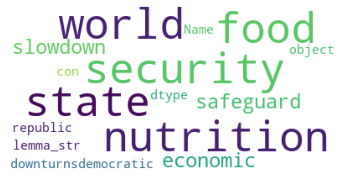

In [9]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                         
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

## Text preparation

Text in the corpus needs to be converted to a format that can be interpreted by the machine learning algorithms. 
There are 2 parts of this conversion

— Tokenisation and Vectorisation.
Tokenisation is the process of converting the continuous text into a list of words. 
The list of words is then converted to a matrix of integers by the process of vectorisation. Vectorisation is also called feature extraction.

For text preparation we use the bag of words model which ignores the sequence of the words and only considers word frequencies.

### Creating a vector of word counts
As the first step of conversion, we will use the CountVectoriser to tokenise the text and build a vocabulary of known words.
We first create a variable “cv” of the CountVectoriser class, and then evoke the fit_transform function to learn and build the vocabulary.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=1.0, min_df=1, max_features=None, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [11]:
list(cv.vocabulary_.keys())[:50]


['food',
 'security',
 'nutrition',
 'world',
 'state',
 'safeguard',
 'economic',
 'slowdown',
 'downturnsdemocratic',
 'republic',
 'congo',
 'young',
 'woman',
 'sell',
 'fruit',
 'street',
 'market',
 'cover',
 'photograph',
 'shutterstock',
 'valeriya',
 'anufriyeva',
 'flagship',
 'publication',
 'part',
 'series',
 'agriculture',
 'organization',
 'united',
 'nation',
 'require',
 'citation',
 'fao',
 'ifad',
 'unicef',
 'wfp',
 '2019',
 'downturns',
 'rome',
 'licence',
 'cc',
 'by',
 'nc',
 'sa',
 'igo',
 'designation',
 'employ',
 'presentation',
 'material',
 'information']

### Unigram Bigram and trigram 

https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

[Text(0, 0, 'food'),
 Text(1, 0, 'country'),
 Text(2, 0, 'economic'),
 Text(3, 0, 'income'),
 Text(4, 0, 'nutrition'),
 Text(5, 0, 'year'),
 Text(6, 0, 'insecurity'),
 Text(7, 0, 'child'),
 Text(8, 0, 'world'),
 Text(9, 0, 'commodity'),
 Text(10, 0, 'low'),
 Text(11, 0, '10'),
 Text(12, 0, 'security'),
 Text(13, 0, 'million'),
 Text(14, 0, '2019'),
 Text(15, 0, 'growth'),
 Text(16, 0, 'high'),
 Text(17, 0, 'fao'),
 Text(18, 0, 'percent'),
 Text(19, 0, 'age')]

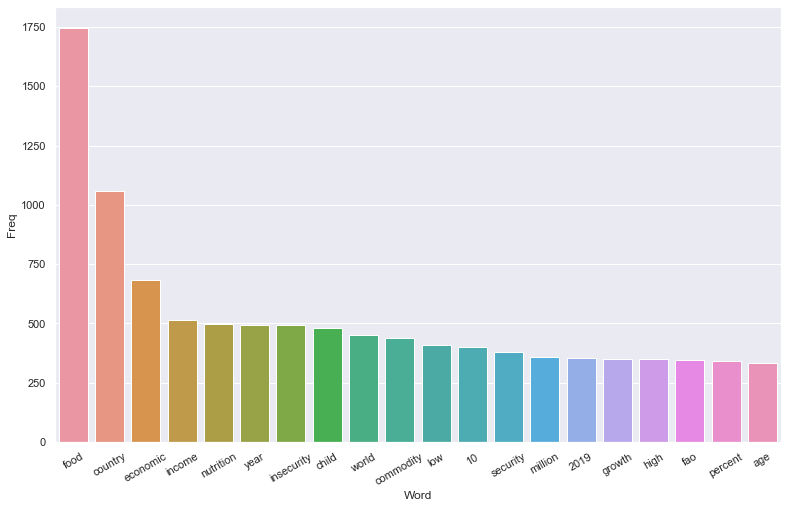

In [12]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

               Bi-gram  Freq
0      food insecurity   483
1        food security   358
2   security nutrition   240
3      million million   234
4       income country   180
5      economic growth   176
6           world bank   156
7    economic slowdown   149
8          severe food   144
9        middle income   142
10           2019 http   140
11            may 2019   120
12            year age   117
13          child year   107
14     low birthweight   104
15       washington dc   101
16   slowdown downturn    97
17       food insecure    94
18         food crisis    88
19               10 10    87


[Text(0, 0, 'food insecurity'),
 Text(1, 0, 'food security'),
 Text(2, 0, 'security nutrition'),
 Text(3, 0, 'million million'),
 Text(4, 0, 'income country'),
 Text(5, 0, 'economic growth'),
 Text(6, 0, 'world bank'),
 Text(7, 0, 'economic slowdown'),
 Text(8, 0, 'severe food'),
 Text(9, 0, 'middle income'),
 Text(10, 0, '2019 http'),
 Text(11, 0, 'may 2019'),
 Text(12, 0, 'year age'),
 Text(13, 0, 'child year'),
 Text(14, 0, 'low birthweight'),
 Text(15, 0, 'washington dc'),
 Text(16, 0, 'slowdown downturn'),
 Text(17, 0, 'food insecure'),
 Text(18, 0, 'food crisis'),
 Text(19, 0, '10 10')]

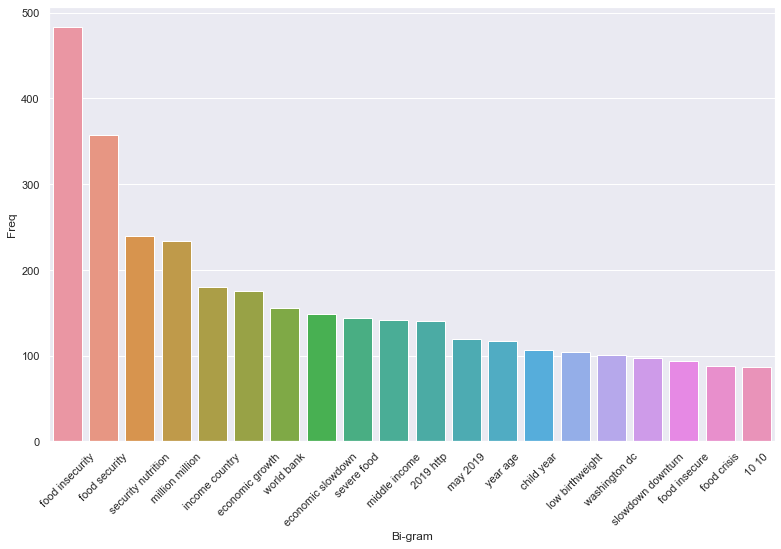

In [13]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0        food security nutrition   239
1        million million million   221
2         severe food insecurity   132
3          middle income country   106
4                 child year age   101
5     economic slowdown downturn    94
6                  cite may 2019    79
7                  may 2019 http    75
8           moderate severe food    64
9                  2019 http www    63
10           year age prevalence    61
11                  new york usa    59
12          online washington dc    58
13             low middle income    57
14               april 2019 http    52
15   commodity dependent country    51
16  food insecurity malnutrition    49
17        woman reproductive age    49
18            low income country    46
19         food insecurity total    45


[Text(0, 0, 'food security nutrition'),
 Text(1, 0, 'million million million'),
 Text(2, 0, 'severe food insecurity'),
 Text(3, 0, 'middle income country'),
 Text(4, 0, 'child year age'),
 Text(5, 0, 'economic slowdown downturn'),
 Text(6, 0, 'cite may 2019'),
 Text(7, 0, 'may 2019 http'),
 Text(8, 0, 'moderate severe food'),
 Text(9, 0, '2019 http www'),
 Text(10, 0, 'year age prevalence'),
 Text(11, 0, 'new york usa'),
 Text(12, 0, 'online washington dc'),
 Text(13, 0, 'low middle income'),
 Text(14, 0, 'april 2019 http'),
 Text(15, 0, 'commodity dependent country'),
 Text(16, 0, 'food insecurity malnutrition'),
 Text(17, 0, 'woman reproductive age'),
 Text(18, 0, 'low income country'),
 Text(19, 0, 'food insecurity total')]

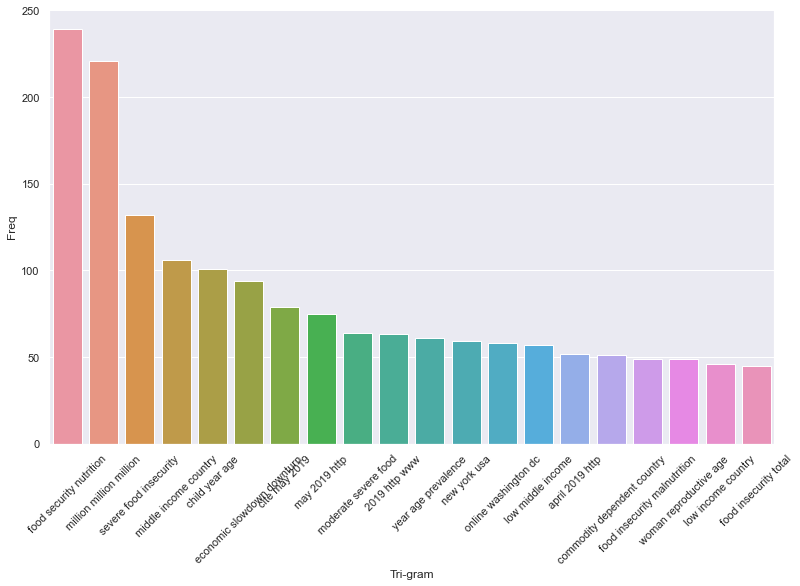

In [14]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

## Topic Modeling

https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d

In [15]:


tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None)
tf = tf_vectorizer.fit_transform(df['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,00,000,0000069227,0001,000198119871985198319891991199319951997199920012003200520072009201120132015china,0002,0003,0004,0005,0006,...,ﬁsoftﬂ,ﬁsupply,ﬁthe,ﬁthis,ﬁtrade,ﬁtradeﬂ,ﬁvery,ﬁzero,ﬁzeroﬂ,ﬂany
0,30,31,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### Latent Dirichlet Allocation (LDA) Topic Modeling

In [16]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=50, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
food country child economic insecurity income 10 2019 nutrition world
Topic 1:
food country million insecurity world nutrition year economic child 2019
Topic 2:
food country economic year income high insecurity nutrition 10 data
Topic 3:
food country year economic income nutrition world child commodity security
Topic 4:
food country economic income child million percent commodity low year
Topic 5:
food country insecurity economic child year commodity security fao high
Topic 6:
food country economic income year low commodity 2019 population fao
Topic 7:
food country economic income insecurity 2019 world commodity nutrition child
Topic 8:
food country world economic security year data 10 income commodity
Topic 9:
food country economic income nutrition year insecurity child world commodity


### pyLDAvis

In [17]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel


C:\Users\mwamb\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
9      -98.874016  502.456726       1        1  99.998857
3       23.561258  222.566666       2        1   0.000127
0      -76.866547 -293.687897       3        1   0.000127
7     -313.490143  251.840164       4        1   0.000127
8      230.966919  488.335358       5        1   0.000127
2      252.704346 -308.311859       6        1   0.000127
1      359.407074  219.534943       7        1   0.000127
6     -202.910126  -24.288548       8        1   0.000127
4      467.877777  -57.939423       9        1   0.000127
5      132.108643  -27.617451      10        1   0.000127, topic_info=     Category         Freq          Term        Total  loglift  logprob
4465  Default  1726.000000          food  1726.000000  30.0000  30.0000
3546  Default  1044.000000       country  1044.000000  29.0000  29.0000
4009  Default   674.000000      economic   674.000000  28.0000  28.0000
5079  Default   506.000000        income   506.000000  27.0000  27.0000
8826  Default   487.000000          year   487.000000  26.0000  26.0000
...       ...          ...           ...          ...      ...      ...
4191  Topic10     0.000012      estimate   273.783431  -3.3304  -8.9920
6508  Topic10     0.000012        online   207.553425  -3.0566  -8.9951
5920  Topic10     0.000012  malnutrition   222.385777  -3.1260  -8.9955
7631  Topic10     0.000012        severe   175.973666  -2.8975  -9.0011
6813  Topic10     0.000012    population   312.231070  -3.4669  -8.9970

[642 rows x 6 columns], token_table=      Topic      Freq  \
term                    
4         1  0.914227   
141       1  0.914811   
154       1  0.999305   
222       1  0.914508   
227       1  0.914043   
...     ...       ...   
8834      1  0.913603   
8872      1  0.914060   
8892      1  0.914520   
8918      1  0.914945   
8943      1  0.914565   

                                                                                  Term  
term                                                                                    
4     000198119871985198319891991199319951997199920012003200520072009201120132015china  
141                                                                                0he  
154                                                                                 10  
222                                                                              11736  
227                                                                          1179œ1199  
...                                                                                ...  
8834                                                                           yearœon  
8872                                                                             åland  
8892                                                                       ﬁbargaining  
8918                                                                           ﬁmaking  
8943                                                                             ﬁthis  

[341 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 1, 8, 9, 3, 2, 7, 5, 6])